In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving cancer_classification.csv to cancer_classification.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cancer_classification.csv']))

In [4]:
#Check to see if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose

<bound method DataFrame.transpose of        mean radius  mean texture  ...  worst fractal dimension  benign_0__mal_1
count   569.000000    569.000000  ...               569.000000       569.000000
mean     14.127292     19.289649  ...                 0.083946         0.627417
std       3.524049      4.301036  ...                 0.018061         0.483918
min       6.981000      9.710000  ...                 0.055040         0.000000
25%      11.700000     16.170000  ...                 0.071460         0.000000
50%      13.370000     18.840000  ...                 0.080040         1.000000
75%      15.780000     21.800000  ...                 0.092080         1.000000
max      28.110000     39.280000  ...                 0.207500         1.000000

[8 rows x 31 columns]>

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


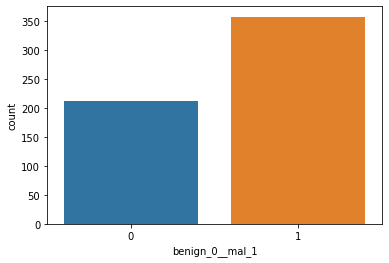

In [9]:
sns.countplot(x='benign_0__mal_1',data=df)

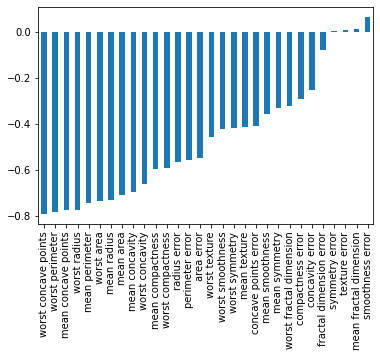

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

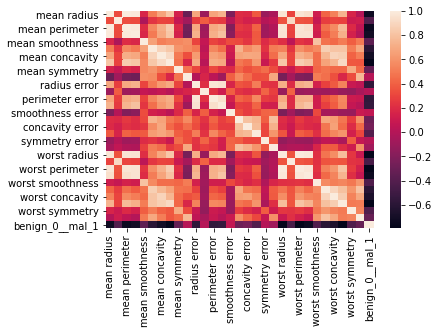

In [13]:
sns.heatmap(df.corr())

In [14]:
X = df.drop('benign_0__mal_1',axis =1).values
y= df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) 

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
from tensorflow.keras.models import Sequential

In [23]:
from tensorflow.keras.layers import Dense,Dropout

In [24]:
X_train.shape

(426, 30)

In [28]:
model = Sequential()
model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [29]:
model.fit(x=X_train,y=y_train,epochs = 600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6702 - val_loss: 0.6480
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6313 - val_loss: 0.6135
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5954 - val_loss: 0.5772
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5576 - val_loss: 0.5356
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5161 - val_loss: 0.4920
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4749 - val_loss: 0.4476
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4331 - val_loss: 0.4052
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3959 - val_loss: 0.3655
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3594 - val_loss: 0.3294
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3271 - val_loss: 0.2959
Epoch 11

In [30]:
losses = pd.DataFrame(model.history.history)

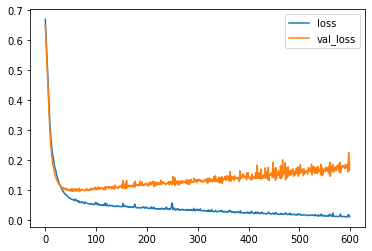

In [32]:
losses.plot()

In [33]:
model = Sequential()
model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',mode = 'min', verbose=1, patience = 25)

In [36]:
model.fit(x=X_train,y=y_train,epochs = 600, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6584 - val_loss: 0.6471
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6320 - val_loss: 0.6250
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6066 - val_loss: 0.5939
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5732 - val_loss: 0.5545
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5313 - val_loss: 0.5068
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4819 - val_loss: 0.4511
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4297 - val_loss: 0.3941
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3793 - val_loss: 0.3440
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3312 - val_loss: 0.2972
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2910 - val_loss: 0.2642
Epoch 11/

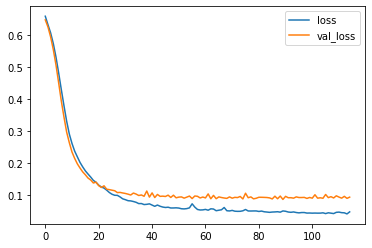

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [38]:
model = Sequential()
model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [39]:
model.fit(x=X_train,y=y_train,epochs = 600, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6980 - val_loss: 0.6828
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6805 - val_loss: 0.6676
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6562 - val_loss: 0.6481
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6541 - val_loss: 0.6297
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6200 - val_loss: 0.6004
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6065 - val_loss: 0.5724
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5875 - val_loss: 0.5420
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5478 - val_loss: 0.5066
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5214 - val_loss: 0.4675
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4999 - val_loss: 0.4272
Epoch 11/

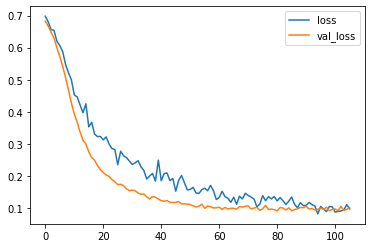

In [40]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [41]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [45]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
